In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


**DATA DESCRIPTION**

1. sl_no ----> Serial Number
2. gender ---> Gender- Male='M',Female='F'
3. ssc_p ---> Secondary Education percentage- 10th Grade
4. ssc_b ---> Board of Education- Central/ Others
5. hsc_p ---> Higher Secondary Education percentage- 12th Grade
6. hsc_b ---> Board of Education- Central/ Others
7. hsc_s ---> Specialization in Higher Secondary Education
8. degree_p ---> Degree Percentage
9. degree_t ---> Under Graduation(Degree type)- Field of degree education
10. workex ---> Work Experience
11. etest_p ---> Employability test percentage ( conducted by college)
12. specialisation ---> Post Graduation(MBA)- Specialization
13. mba_p ---> MBA percentage
14. status ---> Status of placement- Placed/Not placed
15. salary ---> Salary offered by corporate to candidates

# Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report



In [3]:
df = pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
df = df.fillna(0)

In [9]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# Data Visualization

In [10]:
df_deg = df.degree_t.value_counts()

trace = go.Bar(
    x=df_deg.index,
    y=df_deg.values,
    marker=dict(
        color = df_deg.values,
        colorscale='electric',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='Field of degree education', 
    yaxis = dict(title = '# of Students')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [11]:
df_deg = df.hsc_s.value_counts()

trace = go.Bar(
    x=df_deg.index,
    y=df_deg.values,
    marker=dict(
        color = df_deg.values,
        colorscale='electric',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='Specialization in Higher Secondary Education', 
    yaxis = dict(title = '# of Students')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

* **In higher education, students mostly preferred commerce and science instead of arts degree**

In [12]:
types = df['gender'].value_counts().reset_index()

trace = go.Pie(labels=types['index'], values=types['gender'], 
               pull=[0.1, 0], marker=dict(colors=["blue", "pink"]),
               title="Genders")
fig = go.Figure([trace])
fig.show()

* **Our dataset contains almost 3 male for every 2 female students**

In [13]:
types = df['specialisation'].value_counts().reset_index()

trace = go.Pie(labels=types['index'], values=types['specialisation'], 
               pull=[0.1, 0], marker=dict(colors=["#BC08A6", "32BCA1"]),
               title="specialisation")
fig = go.Figure([trace])
fig.show()

*** Even though numbers are close to each other, there are more students choose to specialize in Marketing & Finance**

In [14]:
types = df['workex'].value_counts().reset_index()

trace = go.Pie(labels=types['index'], values=types['workex'], 
               pull=[0.1, 0], marker=dict(colors=["#4992EB", "#CCEB31"]),
               title="Work Experience")
fig = go.Figure([trace])
fig.show()

* Higher percentage of students does not have any prior work experience

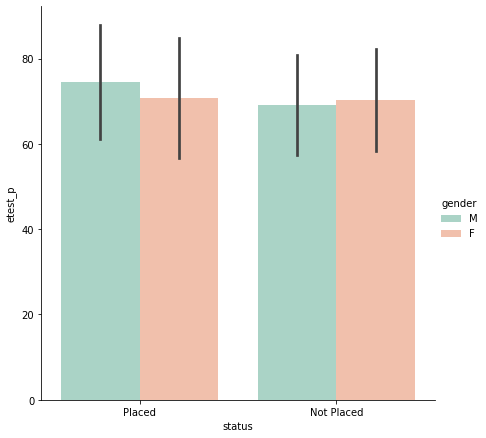

In [15]:
sns.catplot(
    data=df, kind="bar",
    x="status", y="etest_p", hue="gender",
    ci="sd", palette="Set2", alpha=.6, height=6)


* Placed: Male's have higher employability test percentage
* Not Placed: Female's have higher employability test percentage

<AxesSubplot:xlabel='hsc_p', ylabel='Count'>

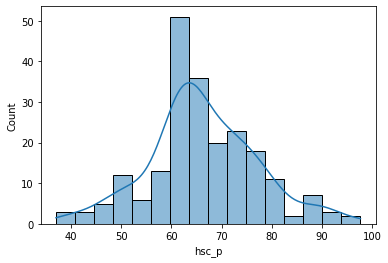

In [16]:
sns.histplot(data=df, x="hsc_p" , kde=True)

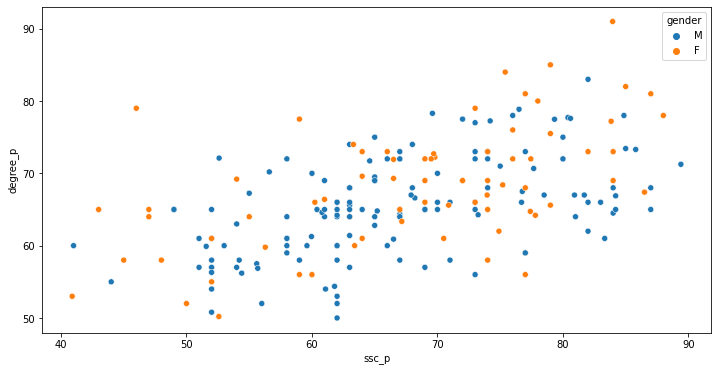

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='ssc_p', y='degree_p', hue='gender')
plt.show()

<AxesSubplot:xlabel='gender', ylabel='salary'>

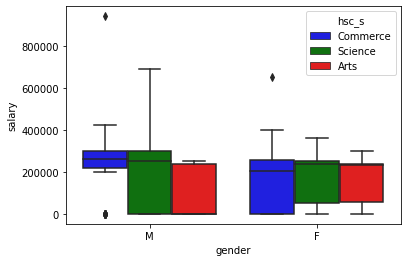

In [18]:
sns.boxplot(x='gender', y='salary', hue='hsc_s', data=df, palette=['blue', 'green', 'red'])

<AxesSubplot:>

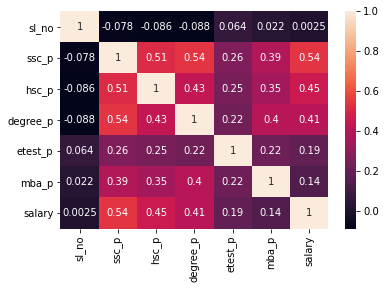

In [19]:
sns.heatmap(df.corr(), annot=True)

In [20]:
print('Categorical Variables are: \n',df.select_dtypes(include=['object']).columns.tolist())

Categorical Variables are: 
 ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


In [21]:
print('Numerical Variables are: \n', df.select_dtypes(exclude=['object']).columns.tolist())

Numerical Variables are: 
 ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [22]:
df.drop(['sl_no','salary'], axis=1 , inplace=True)

In [23]:
categorical_var =  ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
for var in categorical_var:
    print(df[var].unique())

['M' 'F']
['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Data Preprocessing

In [25]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['status'] = le.fit_transform(df['status'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])
#le.fit_transform(df['workex'])
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1


In [26]:
ohe = OneHotEncoder()
df['hsc_s'] = pd.Categorical(df['hsc_s'])
dfDummies_hsc_s = pd.get_dummies(df['hsc_s'], prefix = 'hsc_s_ohe')
dfDummies_hsc_s

print("********************************")

df['degree_t'] = pd.Categorical(df['degree_t'])
dfDummies_degree_t = pd.get_dummies(df['degree_t'], prefix = 'degree_t_ohe')
dfDummies_degree_t

********************************


,degree_t_ohe_Comm&Mgmt,degree_t_ohe_Others,degree_t_ohe_Sci&Tech
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
210,1,0,0
211,0,0,1
212,1,0,0
213,1,0,0


In [27]:
df.drop("hsc_s", axis=1, inplace=True)
df.drop("degree_t", axis=1, inplace=True)

df = pd.concat([df, dfDummies_hsc_s], axis=1)
df = pd.concat([df, dfDummies_degree_t], axis=1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_s_ohe_Arts,hsc_s_ohe_Commerce,hsc_s_ohe_Science,degree_t_ohe_Comm&Mgmt,degree_t_ohe_Others,degree_t_ohe_Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [28]:
scaled = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

In [29]:
ss = StandardScaler()
columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
scaled = ss.fit_transform(df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

df=df.merge(scaled, left_index=True, right_index=True, how = "right")
df

,gender,ssc_b,hsc_b,workex,specialisation,status,hsc_s_ohe_Arts,hsc_s_ohe_Commerce,hsc_s_ohe_Science,degree_t_ohe_Comm&Mgmt,degree_t_ohe_Others,degree_t_ohe_Sci&Tech,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,1,1,1,0,1,1,0,1,0,0,0,1,-0.028087,2.268812,-1.140102,-1.291091,-0.597647
1,1,0,1,1,0,1,0,0,1,0,0,1,1.113369,1.103448,1.513267,1.087157,0.687620
2,1,0,0,0,0,1,1,0,0,1,0,0,-0.213238,0.153313,-0.322843,0.218908,-0.769474
3,1,0,0,0,1,0,0,0,1,0,0,1,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396
4,1,0,0,0,0,1,0,1,0,1,0,0,1.712332,0.668391,0.943909,1.864806,-1.164676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,1,1,0,0,1,0,1,0,1,0,0,1.230940,1.441008,1.529612,1.426906,2.098321
211,1,1,1,0,0,1,0,0,1,0,0,1,-0.861266,-0.582513,0.766836,0.143408,-1.487711
212,1,1,1,1,0,1,0,1,0,1,0,0,-0.028087,0.061335,0.903046,-0.989091,1.278706
213,0,1,1,0,1,1,0,1,0,1,0,0,0.619941,-0.030644,-1.140102,-0.158592,-0.351934


In [30]:
y = df["status"]
X = df.drop(['status'],axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [32]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_predicted = decision_tree.predict(X_test)
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_predicted)
decision_tree_acc_score = accuracy_score(y_test,decision_tree_predicted)
print("confussion matrix")
print(decision_tree_conf_matrix)
print("-------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",decision_tree_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,decision_tree_predicted))

confussion matrix
[[14  7]
 [ 6 38]]
-------------------------------------------
Accuracy of DecisionTreeClassifier: 80.0 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        21
           1       0.84      0.86      0.85        44

    accuracy                           0.80        65
   macro avg       0.77      0.77      0.77        65
weighted avg       0.80      0.80      0.80        65



<AxesSubplot:>

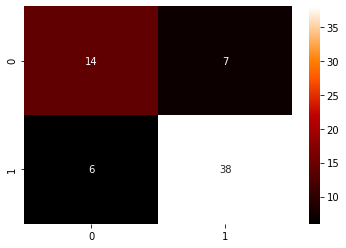

In [33]:
sns.heatmap(decision_tree_conf_matrix, annot=True, cmap="gist_heat")

# Hyper-parameter Optimization

In [34]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(1,14), 
              'min_samples_split': range(2,10), 
              'min_samples_leaf': range(1,3),
             'max_features': ['auto', 'sqrt', 'log2'],
             }

gcv = GridSearchCV(decision_tree, parameters, cv=10).fit(X_train, y_train)
print(f"Best Estimator: {gcv.best_estimator_}")
print(f"Best Parameter: {gcv.best_params_}")
print(f"Best Score: {gcv.best_score_}")

Best Estimator: DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=4)
Best Parameter: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}
Best Score: 0.8666666666666668


Source : https://www.kaggle.com/barisscal/heart-disease-dtclassifier-evaluation-metrics#Decision-Tree

In [35]:
params = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(1,14), 
              'min_samples_split': range(2,8), 
              'min_samples_leaf': range(1,3),
             'max_features': ['auto', 'sqrt', 'log2'],
             }

randomizedcv = RandomizedSearchCV(decision_tree, params, n_iter=1000, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)

print(f'RandomizedSearchCV Best Score: {randomizedcv.best_score_*100}')
print(f'RandomizedSearchCV Best Estimator: {randomizedcv.best_estimator_}')
print(f'RandomizedSearchCV Best Params: {randomizedcv.best_params_}')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
RandomizedSearchCV Best Score: 86.00000000000001
RandomizedSearchCV Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       min_samples_split=7)
RandomizedSearchCV Best Params: {'splitter': 'best', 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'entropy'}


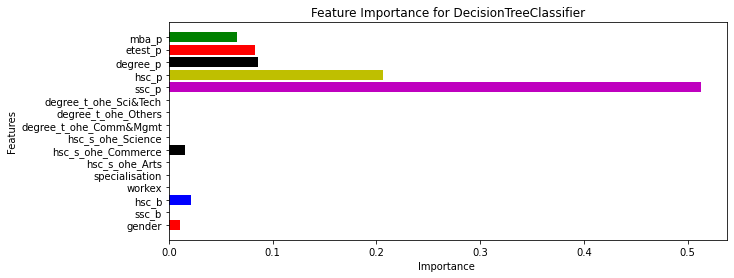

In [36]:
imp_feature = pd.DataFrame({'Feature': ['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation',
       'hsc_s_ohe_Arts', 'hsc_s_ohe_Commerce', 'hsc_s_ohe_Science',
       'degree_t_ohe_Comm&Mgmt', 'degree_t_ohe_Others',
       'degree_t_ohe_Sci&Tech', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p',
       'mba_p'], 'Importance': decision_tree.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("Feature Importance for DecisionTreeClassifier")
plt.xlabel("Importance ")
plt.ylabel("Features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = ['r', 'g', 'b', 'c', 'm', 'y', 'k'])
plt.show()

# Conclusion

* GridSearchCV gave me better results than RandomizedSearchCV
* ssc_p seen as the most important feature
* We achieve 88% accuracy on DecisionTreeClassifier

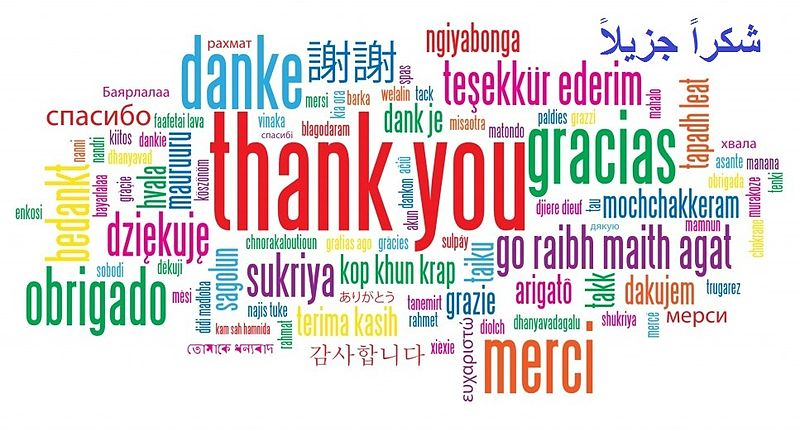

**Thank you for visiting my kernel. !**

**Feel free to comment anything you want**
